                        ANALISIS VENTAS JUEGOS DE VIDEO

El objetivo es identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

# 1. IMPORTACIÓN DE DATOS




In [172]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [113]:
df_games=pd.read_csv('games.csv')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [114]:
df_games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2865,XCOM: Enemy Unknown,PC,2012.0,Strategy,0.27,0.36,0.00,0.08,89.0,8.2,M
10309,Rock Band: Metal Track Pack,Wii,2009.0,Misc,0.10,0.00,0.00,0.01,NaN,tbd,T
13085,Starry ? Sky: In Spring,PSP,2010.0,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN
5488,GT Advance Championship Racing,GBA,2001.0,Racing,0.24,0.09,0.00,0.01,82.0,tbd,E
14056,Richard Burns Rally,PC,2004.0,Racing,0.00,0.03,0.00,0.01,NaN,NaN,NaN
12517,Batman: Rise of Sin Tzu,GC,2003.0,Action,0.05,0.01,0.00,0.00,63.0,tbd,T
10962,Resident Evil Chronicles HD,PS3,2012.0,Shooter,0.00,0.00,0.09,0.00,NaN,NaN,NaN
2128,Band Hero,Wii,2009.0,Misc,0.59,0.29,0.00,0.09,79.0,6.6,E10+
396,Assassin's Creed Syndicate,PS4,2015.0,Action,0.81,1.99,0.07,0.52,76.0,6.8,M
915,Batman: Arkham Origins,X360,2013.0,Action,1.15,0.56,0.00,0.17,74.0,7.5,T


# 2. ARREGLAR TÍTULOS

In [115]:
title= []

for value in df_games.columns.values:
    title.append(value.lower())

df_games.columns=title
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 3. PROCESAMIENTO DE DATOS

## 3.1 COLUMNA 'name'

In [116]:
#Comprobación de nulos
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [117]:
#Elimiación de 2 filas que tienen datos nulos
df_games.dropna(subset='name', inplace=True)
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## 3.2 COLUMNA 'year of release'

In [118]:
# Comprobación de nulos
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [119]:
#Reemplazo los datos faltantes por -1 para poder cambiar el tipo de dato y que sean facilmente reconocibles en futuros análisis
df_games['year_of_release'].fillna(-1, inplace=True)
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [120]:
# Cambio a int ya que los años son números enteros
df_games['year_of_release']=df_games['year_of_release'].astype('int64')
df_games['year_of_release']


0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16713, dtype: int64

Cambiamos todos los datos ausentes a -1 para poder convertir toda la columna en un int, ya que los años son números enteros. Estos -1 no serán tomados en cuenta en los análisis que involucren el año de lanzamiento.

## 3.3 COLUMNA 'genre'

In [121]:
#Comprobación de nulos
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Las filas borradas en la columna 'name' coinciden con las que tenían datos ausentes en 'genre', por tanto también se eliminaron previamente

## 3.4 COLUMNA 'user score'

In [122]:
df_games[df_games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [123]:
df_games[df_games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-1,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [124]:
#cambiar datos faltantes a -1
df_games['user_score'].fillna(-1, inplace=True)
df_games[df_games['user_score'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [125]:
#cambiar datos to be determined a -1
df_games['user_score'].replace(to_replace='tbd',value=-1, inplace=True)
df_games['user_score']

0          8
1         -1
2        8.3
3          8
4         -1
        ... 
16710     -1
16711     -1
16712     -1
16713     -1
16714     -1
Name: user_score, Length: 16713, dtype: object

In [126]:
#Cambiar el tipo de dato a float e igualar la escala al de critic score
df_games['user_score']=df_games['user_score'].astype('float64')

df_games['user_score'] = df_games['user_score']*10

df_games['user_score']

0        80.0
1       -10.0
2        83.0
3        80.0
4       -10.0
         ... 
16710   -10.0
16711   -10.0
16712   -10.0
16713   -10.0
16714   -10.0
Name: user_score, Length: 16713, dtype: float64

Cambiamos todos los datos ausentes y tbd a -1, ya que los dos cuentan como datos que no nos sirven para ningún análisis, y fue necesario ponerle un número para poder convertir toda la columna en un float (al igual que las otras columnas de Score). Adicionalmente igualamos la escala para que 'user score' también se encuentre entre 0 y 100, de esta manera podríamos hacer comparaciones con 'critic score'.

## 3.5 COLUMNA 'rating'

In [127]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [128]:
#Cambio a nombres más fáciles de entender
df_games['rating'].replace(to_replace=['E','nan','M','T','E10+','K-A','AO','EC','RP'], 
                           value=['everyone','rating_pending', 'mature', 'teen', 'everyone_10+','everyone',
                                  'adults_only','early_childhood','rating_pending'],inplace=True)

df_games['rating'].fillna('rating_pending',inplace=True)
df_games['rating'].unique()

array(['everyone', 'rating_pending', 'mature', 'teen', 'everyone_10+',
       'adults_only', 'early_childhood'], dtype=object)

Cambio los nombres de la clasificación a los nombres completos para una mejor compresión, adicional, se unen las clasificaciones E y K-A ya que equivalen a lo mismo. Se podría considerar lo mismo para EC, sin embargo esta categoría desapareció en 2018.

# 4. ANÁLSIS DE DATOS

## 4.1 VENTAS TOTALES

In [129]:
df_games['total_sales']=df_games['eu_sales'] + df_games['na_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,everyone,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-10.0,rating_pending,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,everyone,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,everyone,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-10.0,rating_pending,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-10.0,rating_pending,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-10.0,rating_pending,0.01


## 4.2 FILTRADO DE DATOS

### 4.2.1 HISTORICO DE LANZAMIENTOS Y VENTAS TOTALES

<AxesSubplot: title={'center': 'Games Released By Year'}, xlabel='Year', ylabel='Number of Games'>

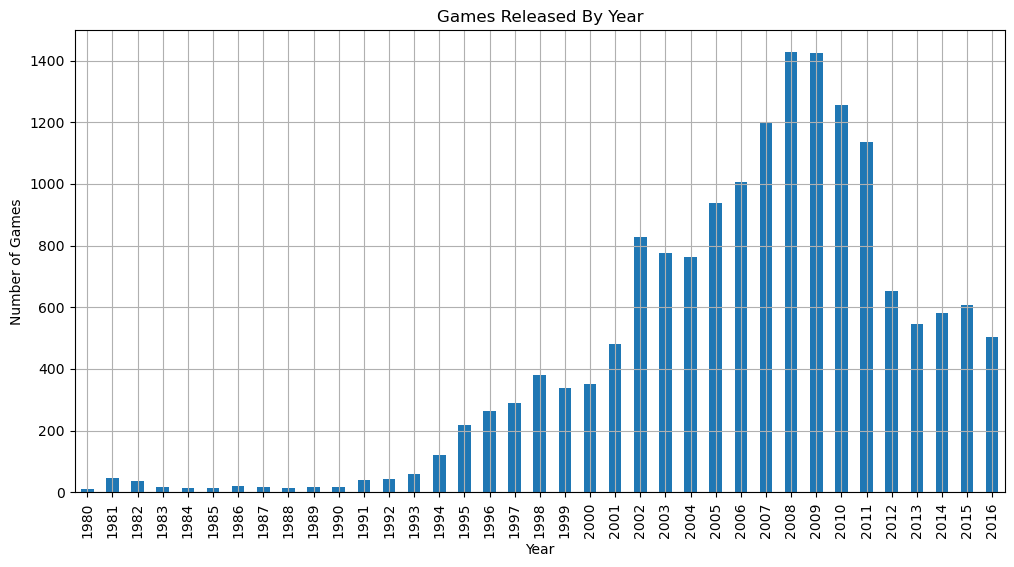

In [130]:
# Número de juegos publicados por año
df_games[df_games['year_of_release']>0]['year_of_release'].value_counts().sort_index().plot(kind='bar', 
                                                                                            title='Games Released By Year',
                                                                                            xlabel='Year',
                                                                                            ylabel='Number of Games',
                                                                                            figsize=(12,6),
                                                                                            grid=True)

Basado en esta gráfica, los datos de lanzamientos de juegos totales por año son relevantes a partir del 2012, ya que son los que se encuentran en un rango similar al 2016, y adicionalmente son los mas cercanos al año que queremos proyectar.

<AxesSubplot: title={'center': 'Sales By Platform'}, xlabel=' ', ylabel='Sales/ Million USD'>

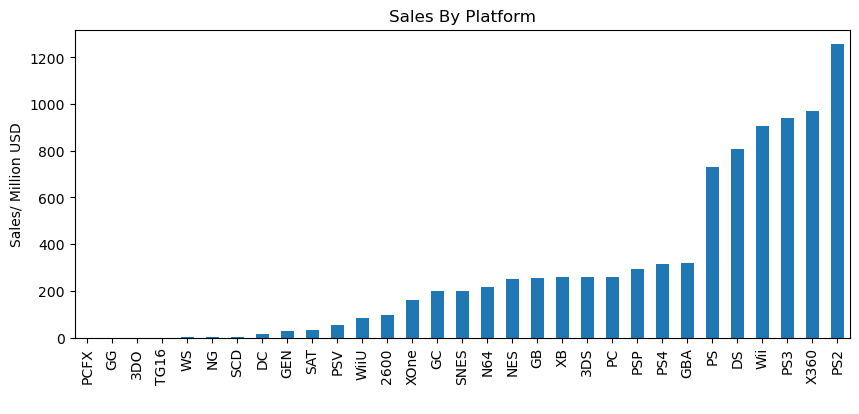

In [131]:
df_games.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar',
                                                                     title='Sales By Platform',
                                                                     xlabel=' ',
                                                                     ylabel='Sales/ Million USD',
                                                                     figsize=(10,4))

En cuanto a las ventas totales, se puede observar que las consolas con mayor aceptación en cuanto a sus juegos son PlayStation 2 y Xbox360. Ambos modelos ya reemplazados por PlayStation 4 y XboxOne. 

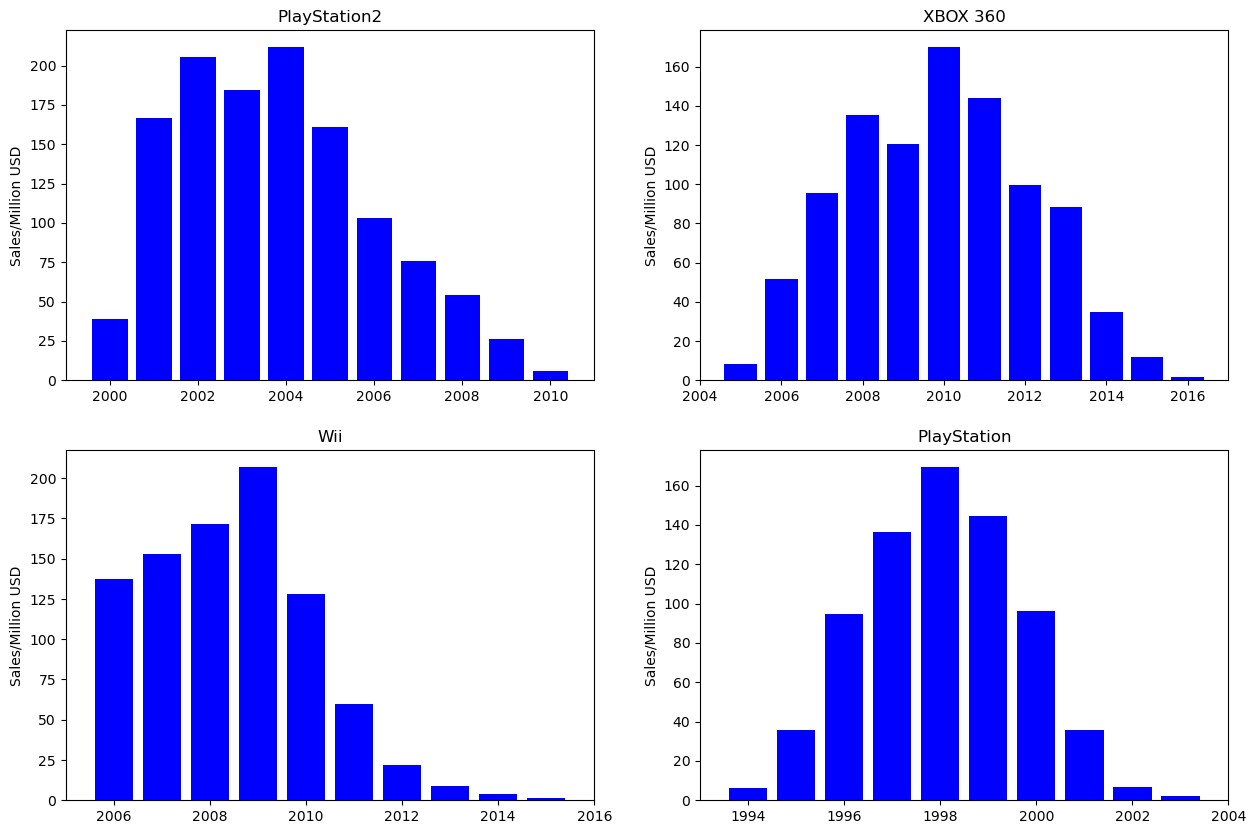

In [132]:
ps2_year=df_games[df_games['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum()
x360_year=df_games[df_games['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum()
wii_year=df_games[df_games['platform'] == 'Wii'].groupby('year_of_release')['total_sales'].sum()
ps_year=df_games[df_games['platform'] == 'PS'].groupby('year_of_release')['total_sales'].sum()

fig, (axs) = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].bar(ps2_year.index, ps2_year.values, color='blue')
axs[0, 0].set_xlim(1999,2011)
axs[0, 0].set_title('PlayStation2')
axs[0, 0].set_ylabel('Sales/Million USD')

axs[0, 1].bar(x360_year.index, x360_year.values, color='blue')
axs[0, 1].set_xlim(2004,2017)
axs[0, 1].set_title('XBOX 360')
axs[0, 1].set_ylabel('Sales/Million USD')

axs[1, 0].bar(wii_year.index, wii_year.values, color='blue')
axs[1, 0].set_xlim(2005,2016)
axs[1, 0].set_title('Wii')
axs[1, 0].set_ylabel('Sales/Million USD')

axs[1, 1].bar(ps_year.index, ps_year.values, color='blue')
axs[1, 1].set_xlim(1993,2004)
axs[1, 1].set_title('PlayStation')
axs[1, 1].set_ylabel('Sales/Million USD')
plt.show()


Tomando en cuenta estas gráficos con algunas de las consolas que mas juegos han vendido, se puede ver que el período en el cual las plataformas tienen una duración de 9 a 10 años en el mercado. Para el año 2016, la única de estas consolas que sigue vigente, es el XBOX360, aunque claramente casi sin ventas.

### 4.2.2 FILTRADO POR AÑOS Y PLATAFORMAS RELEVANTES

In [133]:
#Filtrado a partir del año 2012
df_year = df_games[df_games['year_of_release']>2011]
df_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,mature,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,mature,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-10.0,rating_pending,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,-10.0,rating_pending,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,mature,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01


<AxesSubplot: title={'center': 'Sales By Platform Since 2012'}, xlabel=' ', ylabel='Sales/Million USD'>

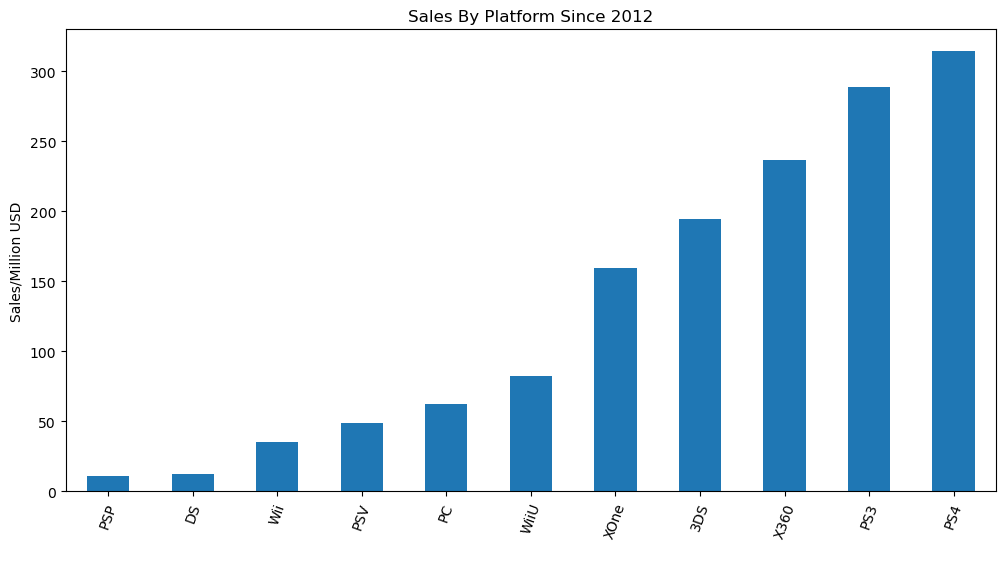

In [134]:
platforms = df_year.groupby('platform')['total_sales'].sum().sort_values()
platforms.plot(kind='bar',figsize=(12,6), title='Sales By Platform Since 2012', xlabel=' ',
                 ylabel='Sales/Million USD',rot=70)

In [135]:
#Filtrado por las 10 plataformas con mayores ventas
df_platform=df_year.query("platform in @platforms.tail(10).index")
df_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,mature,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,mature,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-10.0,rating_pending,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,-10.0,rating_pending,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,mature,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-10.0,rating_pending,0.01


In [136]:
#Creación de tabla clasificando por año y plataformas con mayores ventas 
popular_platform=df_platform.pivot_table(index=['year_of_release','platform'],values='total_sales',aggfunc=sum)
popular_platform

/tmp/ipykernel_19808/2517498779.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  popular_platform=df_platform.pivot_table(index=['year_of_release','platform'],values='total_sales',aggfunc=sum)


total_sales
year_of_release platform             
2012            3DS             51.36
                DS              11.01
                PC              23.22
                PS3            107.36
                PSV             16.19
                Wii             21.71
                WiiU            17.56
                X360            99.74
2013            3DS             56.57
                DS               1.54
                PC              12.38
                PS3            113.25
                PS4             25.99
                PSV             10.59
                Wii              8.59
                WiiU            21.65
                X360            88.58
                XOne            18.96
2014            3DS             43.76
                PC              13.28
                PS3             47.76
                PS4            100.00
                PSV             11.90
                Wii              3.75
                WiiU            22.03
                X360            34.74
                XOne            54.07
2015            3DS             27.78
                PC               8.52
                PS3             16.82
                PS4            118.90
                PSV              6.25
                Wii              1.14
                WiiU            16.35
                X360            11.96
                XOne            60.14
2016            3DS             15.14
                PC               5.25
                PS3              3.60
                PS4             69.25
                PSV              4.25
                Wii              0.18
                WiiU             4.60
                X360             1.52
                XOne            26.15

<function matplotlib.pyplot.show(close=None, block=None)>

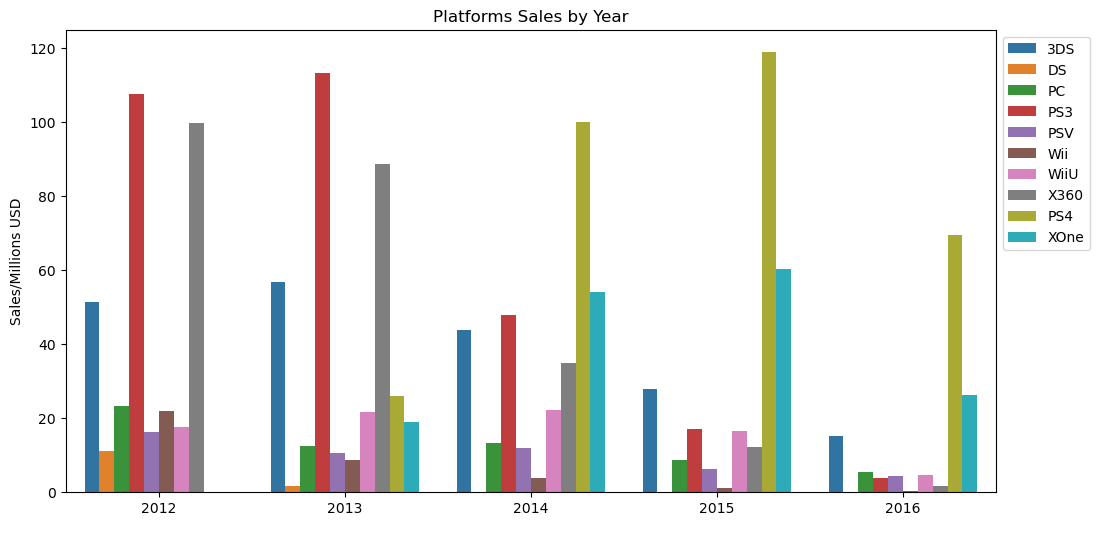

In [137]:
#Gráfico de comparación top 10 ventas de juegos por plataforma
plt.figure(figsize=(12,6))
sns.barplot( x='year_of_release', hue='platform',y='total_sales', 
           data=popular_platform).set_title('Platforms Sales by Year')

plt.xlabel(' ')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.ylabel('Sales/Millions USD')
plt.show


- De acuerdo al gráfico anterior, se puede observar que Todas las plataformas muestran un declive en comparación a las ventas en los años 2014 y 2015. 
- Actualmente la plataforma que vende mas juegos es el PlayStation4, y con un margen considerable sobre la segunda que corresponde a Xbox One. Si consideramos que pueden haber datos faltantes y damos relevancia a los datos del 2015, las únicas plataformas que crecieron fueron las dos mencionadas previamente. 
- Las plataformas que decrecieron en mayor medida fueron las versiones previas a las mas vendidas actualmente, es decir, PS3 y X360, lo cual hace sentido debido a la actualización del modelo. 
- Otras plataformas que pueden ser relevantes son la consola de Nintendo WiiU que mantiene unas ventas de juegos estables hasta 2015, y PC que es una plataforma permanente (diferentes fabricantes) y estable en ventas a lo largo de los años.

## 4.3 COMPARACIÓN PLATAFORMAS RELEVANTES

In [138]:
#Tabla filtrada por las 4 plataformas relevantes
df_important = df_platform[df_platform['platform'].isin(['PS4','XOne','PC','WiiU'])]
df_important

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-10.0,rating_pending,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,mature,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,everyone,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,-10.0,rating_pending,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,mature,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,85.0,everyone,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,67.0,rating_pending,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,-10.0,mature,0.01
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,NaN,-10.0,teen,0.01


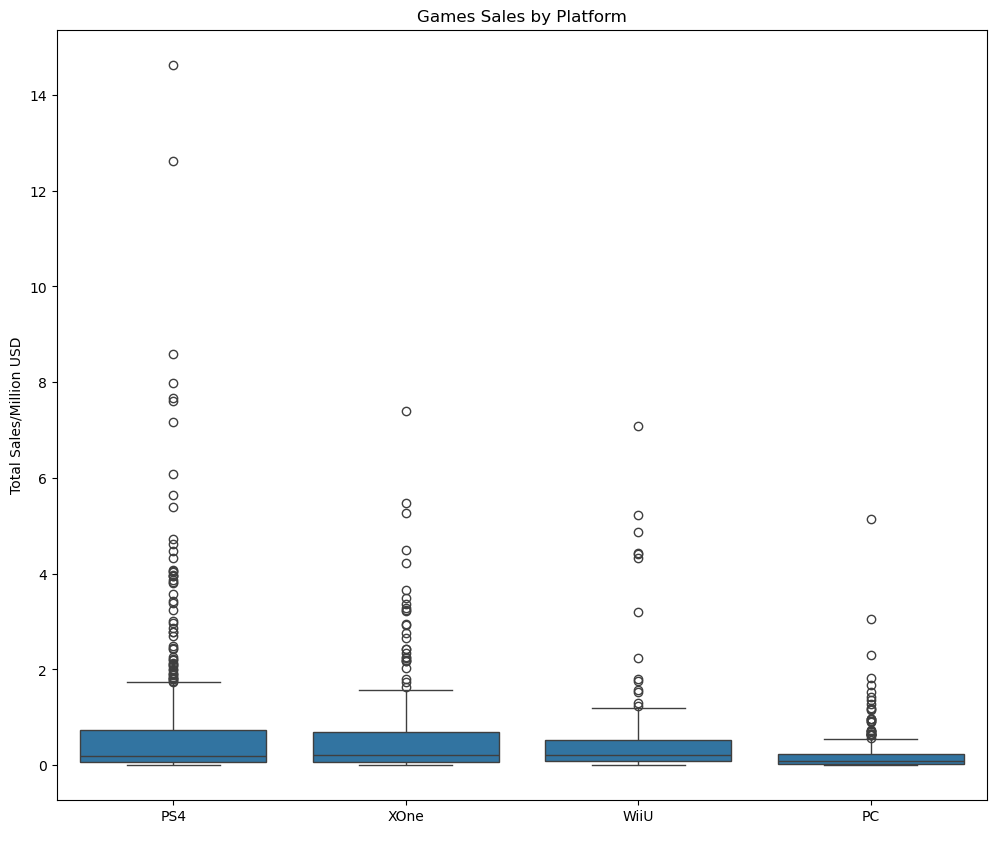

In [139]:
plt.figure(figsize=(12,10))
sns.boxplot(x='platform', y='total_sales', data=df_important)
plt.title('Games Sales by Platform')
plt.ylabel('Total Sales/Million USD')
plt.xlabel(' ')
plt.show()

In [140]:
df_important[df_important['platform']== 'PS4']['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [141]:
df_important[df_important['platform']== 'XOne']['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [142]:
df_important[df_important['platform']== 'WiiU']['total_sales'].describe()

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: total_sales, dtype: float64

In [143]:
df_important[df_important['platform']== 'PC']['total_sales'].describe()

count    250.00000
mean       0.25060
std        0.49464
min        0.01000
25%        0.03000
50%        0.08000
75%        0.24000
max        5.14000
Name: total_sales, dtype: float64

- Con base en la comparación gráfica, y confirmada a través del método describe, las ventas de juegos de acuerdo a las plataformas tienen valores similares entre PS4 y Xbox One, en el percentil 50 (0.2 millones) y su desviación estandar. Y comparables para su percentil 75 (0.73 - 0.68). Donde se encuentra la mayor diferencia es en los valores atípicos, donde se nota que ciertos juegos de PS4 han sido mucho mas populares que el resto.

- En cuanto a WiiU y Pc, sus valores como era de esperarse son menores en ventas totales.

In [144]:
# Promedio de ventas por plataforma
df_important.groupby('platform')['total_sales'].mean()

platform
PC      0.250600
PS4     0.801378
WiiU    0.559116
XOne    0.645020
Name: total_sales, dtype: float64

Los promedios de venta de juegos por plataforma indican que PS4 tiene una superioridad marcada sobre el resto de plataformas (lo cual es lógico porque sus valores atípicos son mucho mas grandes), mientras que Xbox One,  WiiU y PC tienen un promedio decreciente respectivamente.

## 4.4 ANÁLISIS DE DISPERSION CALIFICACIONES/VENTAS

Text(0.5, 0, 'User Score')

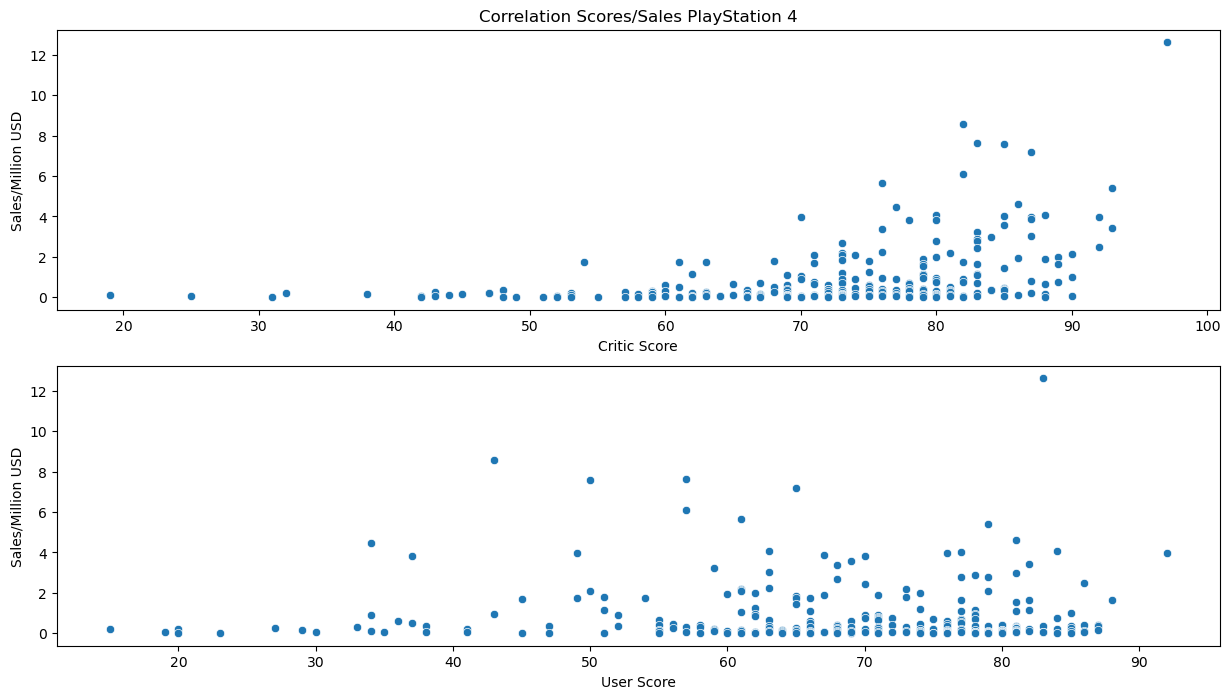

In [145]:
#Filtrado para obtener los datos de PS4 y omitir los datos faltantes en 'user_score'
ps4 = df_important[(df_important['platform']== 'PS4') & 
                   (df_important['user_score'] >= 0)]

#Gráfica de dispersión PS4
fig1, axs1 = plt.subplots(2, 1, figsize=(15, 8))

sns.scatterplot(x='critic_score',y='total_sales', data=ps4,ax=axs1[0])
axs1[0].set_title('Correlation Scores/Sales PlayStation 4')
axs1[0].set_ylabel('Sales/Million USD')
axs1[0].set_xlabel('Critic Score')

sns.scatterplot(x='user_score',y='total_sales', data=ps4,ax=axs1[1])
axs1[1].set_ylabel('Sales/Million USD')
axs1[1].set_xlabel('User Score')

Text(0.5, 0, 'User Score')

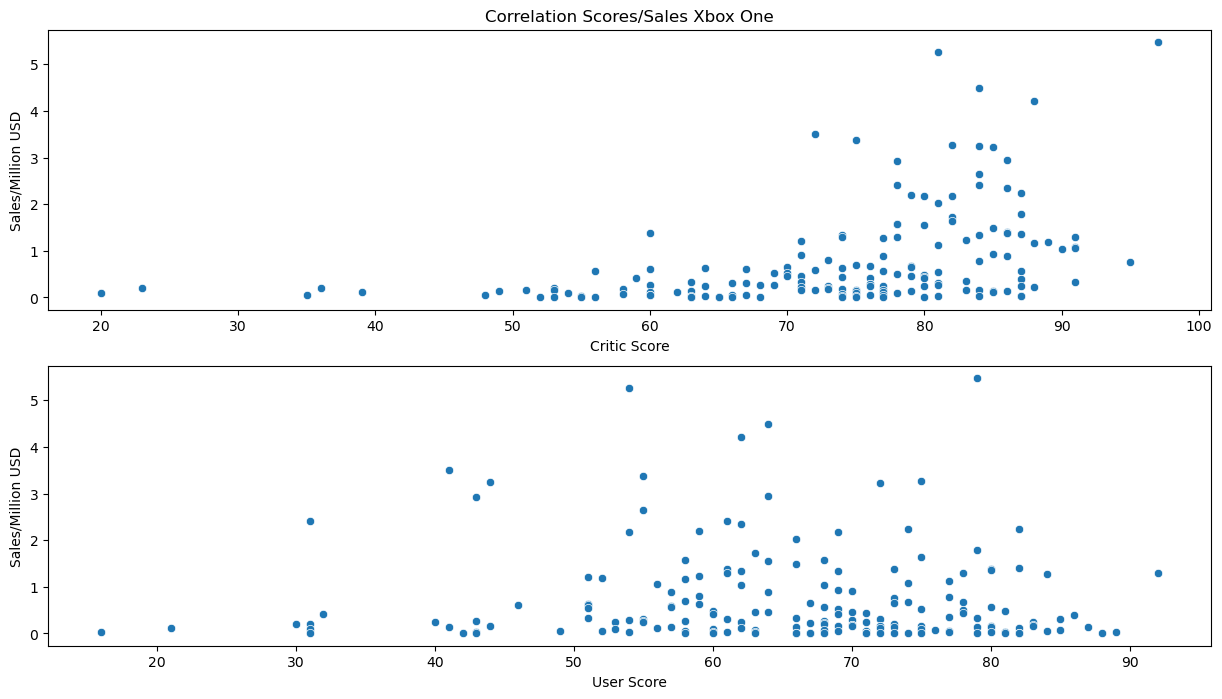

In [146]:
#Filtrado para obtener los datos de Xbox One y omitir los datos faltantes en 'user_score'
xone = df_important[(df_important['platform']== 'XOne') & 
                   (df_important['user_score'] >= 0)]

#Gráfica de dispersión Xbox One
fig2, axs2 = plt.subplots(2, 1, figsize=(15, 8))

sns.scatterplot(x='critic_score',y='total_sales', data=xone,ax=axs2[0])
axs2[0].set_title('Correlation Scores/Sales Xbox One')
axs2[0].set_ylabel('Sales/Million USD')
axs2[0].set_xlabel('Critic Score')

sns.scatterplot(x='user_score',y='total_sales', data=xone,ax=axs2[1])
axs2[1].set_ylabel('Sales/Million USD')
axs2[1].set_xlabel('User Score')

- Analizando las gráficas de dispersión para las Plataformas PS4 y Xbox One, podemos notar que el puntaje de la crítica tiene una correlación ligeramente positiva con los juegos vendidos, donde las ventas mas altas están en el rango de 70 a 100 de calificación.
- En cuanto al puntaje de usuarios, no parece haber una correlación con las ventas de juegos, ya que la cantidad de ventas mas altas, están en el centro de las calificaciones (rango de 40 a 70).

In [147]:
#Correlación ventas/puntaje crítica PS4
ps4['critic_score'].corr(ps4['total_sales'])

0.4058948014583667

In [148]:
#Correlación ventas/puntaje usuarios PS4
ps4['user_score'].corr(ps4['total_sales'])

-0.03195711020455641

In [149]:
#Correlación ventas/puntaje crítica XOne
xone['critic_score'].corr(xone['total_sales'])

0.4104220356129637

In [150]:
#Correlación ventas/puntaje usuarios XOne
xone['user_score'].corr(xone['total_sales'])

-0.06892505328279411

Calculando la correlación, se confirma que existe una relación ligeramente positiva (0,4) entre la crítica y las ventas. 
Mientras que el puntaje de usuarios tiene una correlación cercana a 0 (-0.03) con las ventas.

## 4.5 COMPARACIÓN DE JUEGOS SIMILARES PARA DIFERENTES PLATAFORMAS

In [151]:


games_platform = df_important.groupby(by='name')['platform'].nunique()
#Filtro para juegos que están en las 4 plataformas escogidas
multiplatform_games = games_platform[games_platform >=4].index

df_names=df_important[df_important['name'].isin(multiplatform_games)]
#Eliminación filas extra
df_names.drop(columns=['year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','rating'], inplace=True)
#Creación tabla con juegos quee están en las 4 plataformas
comparission = df_names.pivot_table(index=['name','platform'],values=['total_sales','critic_score','user_score'])
comparission

/tmp/ipykernel_19808/478431798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names.drop(columns=['year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','rating'], inplace=True)


critic_score  total_sales  \
name                            platform                              
Assassin's Creed IV: Black Flag PC                84.0         0.65   
                                PS4               83.0         2.86   
                                WiiU              86.0         0.29   
                                XOne               NaN         2.24   
Call of Duty: Ghosts            PC                 NaN         0.69   
                                PS4               78.0         3.83   
                                WiiU              69.0         0.35   
                                XOne              78.0         2.92   
Darksiders II                   PC                81.0         0.15   
                                PS4                NaN         0.23   
                                WiiU              85.0         0.15   
                                XOne               NaN         0.07   
LEGO Jurassic World             PC                72.0         0.04   
                                PS4               70.0         0.90   
                                WiiU              71.0         0.52   
                                XOne              70.0         0.66   
LEGO Marvel Super Heroes        PC                78.0         0.17   
                                PS4               83.0         1.62   
                                WiiU              82.0         0.74   
                                XOne               NaN         1.05   
LEGO The Hobbit                 PC                68.0         0.05   
                                PS4               72.0         0.60   
                                WiiU               NaN         0.22   
                                XOne              69.0         0.27   
Lego Batman 3: Beyond Gotham    PC                 NaN         0.06   
                                PS4               73.0         0.92   
                                WiiU               NaN         0.46   
                                XOne              74.0         0.44   
The Amazing Spider-Man 2 (2014) PC                 NaN         0.01   
                                PS4                NaN         0.56   
                                WiiU               NaN         0.05   
                                XOne               NaN         0.22   
The LEGO Movie Videogame        PC                68.0         0.06   
                                PS4               71.0         0.67   
                                WiiU              68.0         0.64   
                                XOne              69.0         0.53   
Watch Dogs                      PC                77.0         0.44   
                                PS4               80.0         4.05   
                                WiiU              62.0         0.13   
                                XOne              78.0         1.57   

                                          user_score  
name                            platform              
Assassin's Creed IV: Black Flag PC              77.0  
                                PS4             78.0  
                                WiiU            77.0  
                                XOne            74.0  
Call of Duty: Ghosts            PC             -10.0  
                                PS4             37.0  
                                WiiU            34.0  
                                XOne            43.0  
Darksiders II                   PC              78.0  
                                PS4            -10.0  
                                WiiU            82.0  
                                XOne           -10.0  
LEGO Jurassic World             PC              71.0  
                                PS4             70.0  
                                WiiU            81.0  
                                XOne            67.0  
LEGO Marvel Super Heroes        PC              81.0  
              

<function matplotlib.pyplot.show(close=None, block=None)>

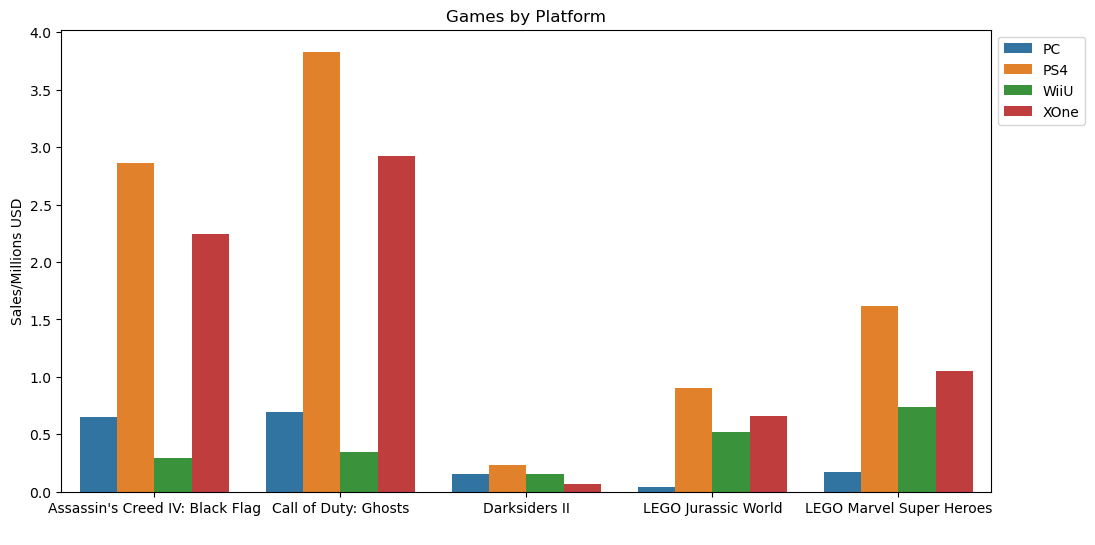

In [152]:
#Gráfico de comparación ventas del mismo juego por plataforma
plt.figure(figsize=(12,6))
sns.barplot( x='name', hue='platform',y='total_sales', 
           data=comparission.head(20)).set_title('Games by Platform')

plt.xlabel(' ')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.ylabel('Sales/Millions USD')
plt.show

- Se confirma a través de la comparación que la plataforma PS4 es la que mas vende independiente de que el juego sea el mismo. 
- El resto de plataformas varían sus ventas por juego y llegan a ser comparables en algunos casos. 

## 4.6 ANALISIS VENTAS POR GÉNERO

<AxesSubplot: title={'center': 'Number of Games by Genre'}, xlabel='Genre', ylabel='Number of games'>

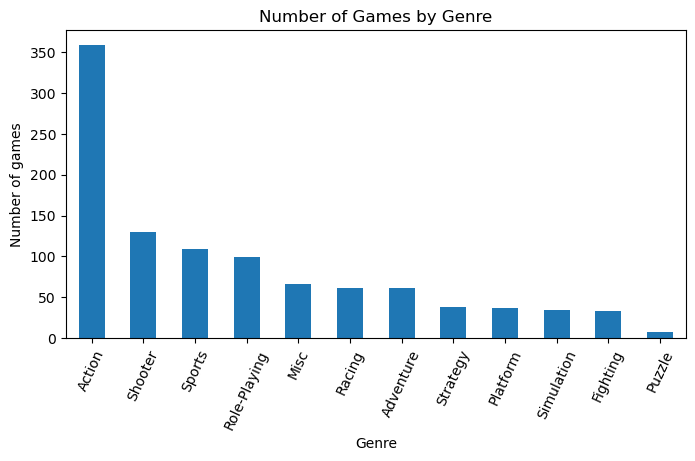

In [153]:
df_important['genre'].value_counts().plot(kind='bar', title='Number of Games by Genre',
                                          xlabel='Genre',
                                          ylabel='Number of games',
                                          figsize=(8,4), rot=65)

La mayoría de juegos en nuestos datos corresponden al género Acción, seguido muy de lejos con menos de la mitad por Shooter, Sports y Role-Playing, que se encuentran muy cercanos.

<AxesSubplot: title={'center': 'Sales by Genre'}, xlabel='Genre', ylabel='Sales/Million USD'>

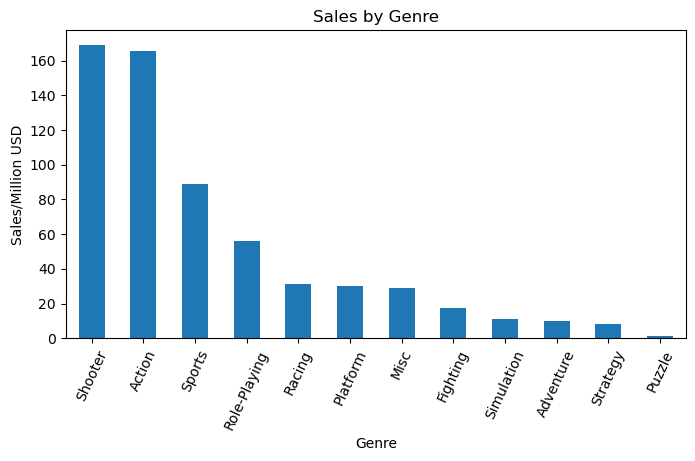

In [154]:
df_important.groupby(by='genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                         figsize=(8,4),
                                                                         xlabel='Genre',
                                                                         ylabel='Sales/Million USD',
                                                                         title='Sales by Genre',
                                                                         rot=65)

- En cuanto a ventas, Shooter es el más vendido a pesar de no tener tantos juegos como Action. Sports también tiene una relevancia importante ya que sus ventas son cerca del 50% que los dos géneros mas comerciales.
- Los géneros con menos ventas concuerdan casi en su totalidad con los que menos han lanzado juegos.
- Esto nos indica que Shooter es el género que mas hay que prestar atención en caso de buscar relevancia en ventas.

## 4.7 ANALISIS POR REGIÓN

### 4.7.1 VENTAS TOTALES POR REGIÓN

In [155]:
#Ventas históricas North América por plataforma
df_games.groupby(by='platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [156]:
#Ventas históricas Japan por plataforma
df_games.groupby(by='platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

In [157]:
#Ventas históricas Europe por plataforma
df_games.groupby(by='platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Tomando los datos históricos, sin filtro por años actuales:
- En Norte América domina Xbox360, seguido muy de cerca por PS2, mientras que Nintendo Wii y PS3 tienen ventas menores por cerca de 100 millones.
- En Japón las plataformas mas representativas cambian totalmente, domina el Nintendo DS, y el único presente de la región NA es el PS2 que en este caso se ubica 3ro en ventas, casi igualados con el PS.
- En Europa podemos ver que el PS2 domina, seguido muy de cerca por PS3 y mas atrás a una diferencia consireables están X360 y Wii. 
- Se puede ver ciertas similitudes entre NA y EU, ya que están presentes casi las mismas plataformas, y varían un poco el orden en cuanto a ventas totales. 
- La región con ventas mas altas es NA, con un tope de 602 millones para 1 sola plataforma, mientras en EU la que mas vendió llegó a 339. Ambas muy superiores a Japón donde el primero llegó a 175 millones.
- La plataforma mas relevante por estar en todos los top por región, y ser segundo en NA y primero en EU es el PS2.

In [158]:
#Ventas Actuales North America por plataforma
df_games[df_games['year_of_release']>2011].groupby(by='platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [159]:
#Ventas Actuales Japón por plataforma
df_games[df_games['year_of_release']>2011].groupby(by='platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

In [160]:
#Ventas Actuales Europa por plataforma
df_games[df_games['year_of_release']>2011].groupby(by='platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Tomando los datos a partir de 2012:
- En Norte América nuevamente domina Xbox360, seguido de cerca por PS3 y PS4 (igualados), mientras que Xbox One tiene ventas menores por cerca de 10 millones.
- En Japón las plataformas mas representativas cambian totalmente, domina el Nintendo 3DS. En este caso, las 3 plataformas de Sony PS3, PSV y PS4 se ubican después con menos de la mitad de ventas que Nintendo.
- En Europa podemos ver que el PS4 domina, seguido por PS3, y diferencia consireables están las plataformas de Microsoft X360 (cercano al 50% de las ventas de PS4) y XboxOne. 
- Se puede ver ciertas similitudes entre NA y EU, ya que están presentes casi las mismas plataformas, y varían un poco el orden en cuanto a ventas totales. En EU dominan las plataformas Sony y en NA se impone Microsoft con Xbox.
- Las regiones NA y Eu están igualadas en cuanto a ventas para una sola plataforma, con un tope de 140 millones, mientras en Japón se vendió 88 millones.
- La plataforma mas relevante por estar en todos los top por región, estar ubicado en mejbuenas posiciones (1ero Eu - 2do NA) y ser la plataforma mas actual de Sony, es el PS4. 

### 4.7.2 GENEROS PRINCIPALES POR REGIÓN

In [161]:
#Ventas históricas Japon por género
df_games.groupby(by='genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

In [162]:
#Ventas históricas Europa por género
df_games.groupby(by='genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [163]:
#Ventas históricas Norteamérica por género
df_games.groupby(by='genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

- Los géneros principales se pueden considerar que son Action y Sports, ya que son los primeros en ventas tanto para EU como para NA, y están presentes como segundo y tercero en JP.
- Adicionalmente Shooter es el 3ero en ventas en EU y NA, aunque no aparece en el top de la región JP.
- El género con mas ventas en JP, que al igual que las plataformas difere mucho de las otras regiones, es Role-Playing. 
- Cabe señalar que Misc es el 5to género con mas ventas en todas las regiones.

### 4.7.3  VENTAS DE ACUERDO A LA CLÁSIFICACIÓN DE LOS JUEGOS

In [165]:
df_rating = df_games[df_games['rating']!='rating_pending']
#Ventas históricas Japon por Clasificación
df_rating.groupby(by='rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

rating
everyone        199.57
teen            151.40
mature           64.24
everyone_10+     40.20
adults_only       0.00
Name: jp_sales, dtype: float64

In [166]:
#Ventas históricas Europa por Clasificación
df_rating.groupby(by='rating')['eu_sales'].sum().sort_values(ascending=False).head(5)

rating
everyone        710.52
mature          483.97
teen            427.03
everyone_10+    188.52
adults_only       0.61
Name: eu_sales, dtype: float64

In [167]:
#Ventas históricas Norteamérica por Clasificación
df_rating.groupby(by='rating')['na_sales'].sum().sort_values(ascending=False).head(5)

rating
everyone           1295.55
teen                759.75
mature              748.48
everyone_10+        353.32
early_childhood       1.53
Name: na_sales, dtype: float64

- En todas las regiones se nota que la clasificación que predomina es E (everyone). Se desmarcan por un margen considerable del resto tanto en NA como JP y EU.
- En todas las regiones Teen y Mature son las clasificaciones que siguen a E, aunque se puede ver que que en las regiones de EU y NA sus ventas son prácticamente iguales, mientras en JP, teen duplica a mature.
- La 4ta clasificación mas popular es everyone 10+, pero a una distancia consireable en ventas del resto.
- Early Chilhood y adults only tienen ventas casi despreciables.

# 5. ANÁLISIS ESTADÍSTICO

## 5.1 PRUEBA DE HIPOTESIS 1

Vamos a comprobar que:
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.



In [169]:
# Preparación de la tabla con los datos de calificaciones de Usuarios
# Filtro solo los juegos que tengan calificación
df_user = df_games [df_games['user_score']>=0]
df_user

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,everyone,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,everyone,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,everyone,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,everyone,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,everyone,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,81.0,everyone,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,76.0,mature,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,58.0,teen,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,72.0,everyone_10+,0.01


In [184]:
#Filtramos los datos para cada plataforma
df_user_platform = df_user.pivot_table(index='platform', values='user_score',aggfunc=['mean','std','count'])
#Calculamos media, desviación estandar y número de muestras
df_user_platform.columns=['mean','std_deviation','n']

#Calculamos la media de la desviación
df_user_platform['average_dev']= df_user_platform['std_deviation']/np.sqrt(df_user_platform['n'])
#Mostramos solo las plataformas para nuestra hipotesis
df_user_platform [df_user_platform.index.isin(['PC','XOne'])]

,mean,std_deviation,n,average_dev
platform,,,,
PC,70.624675,15.299631,770,0.551360
XOne,65.214286,13.809406,182,1.023621


In [182]:
# Prueba hipotesis 1
#H0 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#Ha Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

res=st.ttest_ind(df_user[df_user['platform']=='XOne']['user_score'],
                df_user[df_user['platform']=='PC']['user_score'], equal_var=False, alternative='two-sided')

print('La probabilidad de que la hipotesis nula sea cierta es: ',(res.pvalue*100),'%')


La probabilidad de que la hipotesis nula sea cierta es:  0.0004935072360183449 %


In [181]:
alpha=0.05
if(res.pvalue>alpha):
    print('No se puede negar la hipétesis Nula')
else:
    print('La Hipótesis alternativa es estadísticamente relevante')

La Hipótesis alternativa es estadísticamente relevante


En cuanto a las calificaciones de usuarios para las plataformas Xbox One y PC, es estadísticamente relevante decir que Xbox One y PC tienen promedios diferentes.

## 5.2 PRUEBA DE HIPOTESIS 2

Vamos a comprobar que:
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [183]:
#Filtramos los datos para cada plataforma
df_user_genre = df_user.pivot_table(index='genre', values='user_score',aggfunc=['mean','std','count'])
#Calculamos media, desviación estandar y número de muestras
df_user_genre.columns=['mean','std_deviation','n']

#Calculamos la media de la desviación
df_user_genre['average_dev']= df_user_genre['std_deviation']/np.sqrt(df_user_genre['n'])
#Mostramos solo las plataformas para nuestra hipotesis
df_user_genre [df_user_genre.index.isin(['Action','Sports'])]

,mean,std_deviation,n,average_dev
genre,,,,
Action,70.540437,14.253936,1830,0.333203
Sports,69.611967,16.113704,1103,0.485185


In [185]:
# Prueba hipotesis 2
#H0 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#Ha Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

res2=st.ttest_ind(df_user[df_user['genre']=='Action']['user_score'],
                df_user[df_user['genre']=='Sports']['user_score'], equal_var=False, alternative='two-sided')

print('La probabilidad de que la hipotesis nula sea cierta es: ',(res2.pvalue*100),'%')


La probabilidad de que la hipotesis nula sea cierta es:  11.48381879149927 %


In [186]:
alpha2=0.05
if(res2.pvalue>alpha2):
    print('No se puede negar la hipétesis Nula')
else:
    print('La Hipótesis alternativa es estadísticamente relevante')

No se puede negar la hipétesis Nula


En cuanto a las calificaciones de usuarios para los géneros Action y Sports, es estadísticamente relevante decir que Action y Sports tienen promedios iguales.

# 6. CONCLUSIONES

Gracias al análisis y clasificación en base a la identificación de diferentes patrones, se puede indicar que:
- Los datos históricos que son mas relevantes por estar mas cercanos al año que queremos proyectar (2017) y por tener un volumen de ventas similar, son a partir del 2012.
- Las plataformas mas relevantes tomando en cuenta las ventas que han tenido sus juegos, son sobre todo PS4 y XboxOne, seguidos un poco mas de lejos por WiiU y PC, esto debido a que son las plataformas mas actuales de cada Empresa y que despuntan en los últimos años.
- Si nos remontamos a años anteriores, se puede ver que las plataformas de Sony (sobre todo PS2) y Microsoft (sobre todo Xbox 360), siempre han dominado en ventas.
- Tomando en cuenta los géneros, se puede afirmar que Shooter es el mas popular por ventas, seguido de Action y Sports. Por tanto serían buenas opciones para proyectar lanzamientos de nuevos juegos en 2017.
- En cuanto a la calificación de los juegos, se puede observar que la calificación de la crítica especializada tiene una correlación positiva con las ventas, a diferencia de la calificación de usuario, la cuál no parece tener ninguna influencia sobre la preferencia al momento de comprar.
- Si el análisis se centra en regiones, las ventas por plataforma cambian considerablemente para Japon (donde se prefieren las plataformas de Nintendo), mientras que Europa y Estados Unidos dan prioridad a los juegos para Play Station y Xbox.
- En los datos por región también se identifica que Action y Sports son los géneros que tiene mas aceptación, por lo que pueden ser alternativas principales si queremos proyectar ventas en esos lugares.
- Los análisis estadísiticos a través de la comprobación de una hipótesis nula, nos pueden ayudar a confirmar si los promedios en cuanto a calificaciones por género o plataforma son similares. Podemos aplicar este mismo análisis para comparar opciones de juegos que tengamos en una lista de posibles lanzamientos.

